# Chapter 3

In [16]:
# data prep
# data prep
import pandas as pd
import numpy as np
seeds = pd.read_csv('seeds.csv', header=None)
!head seeds.csv

print(seeds.shape)
grain = seeds[[4,3]]
print(grain[:10])
grains = np.asarray(grain)

15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
14.11,14.1,0.8911,5.42,3.302,2.7,5,1
16.63,15.46,0.8747,6.053,3.465,2.04,5.877,1
16.44,15.25,0.888,5.884,3.505,1.969,5.533,1
(210, 8)
       4      3
0  3.312  5.763
1  3.333  5.554
2  3.337  5.291
3  3.379  5.324
4  3.562  5.658
5  3.312  5.386
6  3.259  5.563
7  3.302  5.420
8  3.465  6.053
9  3.505  5.884


In [17]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

0.8604149377143467


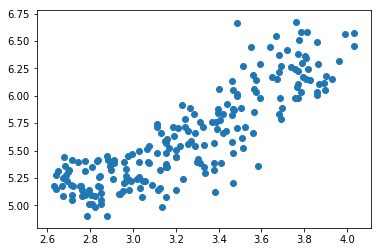

In [18]:
plt.scatter(width, length)
plt.show()

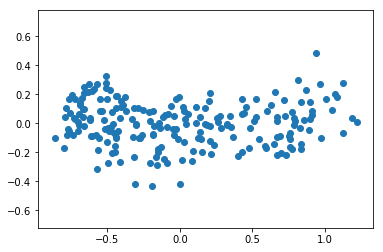

7.474656899453042e-17


In [20]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

## Intrinsic Dimensions
This is a really interesting section about identifying how many dimensions PCA is able to reduce to. You can plot the variance of the PCA features, and this shows which are 'important'. For some data sets, line those with a linear correlation - you will see the first 2 PCA features have the most variance: Others may be present, but their variation is tiny - so we can say the PCA instrinsic dimensions are two. For other data sets, for instance wine, it's hard to determine where the 'elbow' is - the PCA features have an inverse exponential.

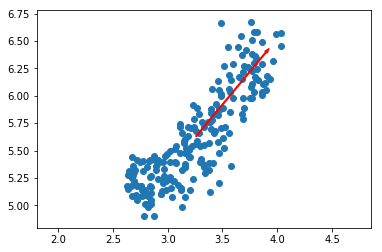

In [21]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
# draws an arrow from x, y to x+dx, y+dx (not polar co-ordinates, simpler!)
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [22]:
print(mean)

[3.25860476 5.62853333]


In [23]:
first_pc

array([0.63910027, 0.76912343])

In [25]:
# data prep
file = 'fish.csv'
fish=pd.read_csv(file, header=None)
print(fish.shape)
print(fish.head(2))

samples = fish.iloc[:,1:]
print(samples.shape)
print(samples.head(2))

species = fish.iloc[:,0]

(85, 7)
       0      1     2     3     4     5     6
0  Bream  242.0  23.2  25.4  30.0  38.4  13.4
1  Bream  290.0  24.0  26.3  31.2  40.0  13.8
(85, 6)
       1     2     3     4     5     6
0  242.0  23.2  25.4  30.0  38.4  13.4
1  290.0  24.0  26.3  31.2  40.0  13.8


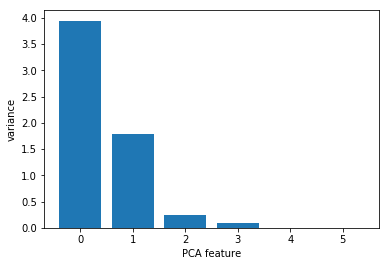

In [27]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [30]:
scaled_samples = scaler.fit_transform(samples)
scaled_samples.shape

(85, 6)

In [31]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


Excellent - now we play with word frequency array's

In [34]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [36]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [37]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [39]:
# data prep - compile the word frequency matrix
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [41]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


                                          article  label
29                               Jennifer Aniston      0
22                              Denzel Washington      0
23                           Catherine Zeta-Jones      0
24                                   Jessica Biel      0
28                                  Anne Hathaway      0
25                                  Russell Crowe      0
26                                     Mila Kunis      0
27                                 Dakota Fanning      0
21                             Michael Fassbender      0
20                                 Angelina Jolie      0
40                                    Tonsillitis      1
43                                       Leukemia      1
44                                           Gout      1
45                                    Hepatitis C      1
46                                     Prednisone      1
47                                          Fever      1
48                             